### Importing Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as sci
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api
import numpy as np
sns.set(rc = {'figure.figsize':(12,5)})

### Reading the Dataset

In [2]:
data=pd.read_csv('train.csv')
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K
5,24,Private,274505,Bachelors,12,Never-married,Prof-specialty,Own-child,White,Female,2,0,40,United-States,<=50K
6,40,Private,80789,HS-grad,8,Married-civ-spouse,Adm-clerical,Wife,White,Female,13,0,35,United-States,>50K
7,42,Federal-gov,243759,Some-college,10,Divorced,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,18,0,39,Cuba,>50K
8,37,Private,67638,Bachelors,12,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,4,0,39,Philippines,>50K
9,52,Self-emp-not-inc,130237,HS-grad,8,Married-civ-spouse,Sales,Husband,White,Male,0,1,55,Mexico,<=50K


### Summary Statistics and Dataframe Properties

In [3]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [4]:
print(data.shape)

(18944, 15)


In [5]:
print(data.describe())

                age         fnlwgt  education-num  capital-gain  capital-loss  \
count  18944.000000   18944.000000   18944.000000  18944.000000  18944.000000   
mean      39.266470  164292.035156       9.479043    577.476510     33.082823   
std       13.395878   93425.986084       2.830047   2414.473217    248.521486   
min       14.000000    8019.000000       2.000000    -58.000000     -2.000000   
25%       28.000000   98530.750000       8.000000     -5.000000      0.000000   
50%       40.000000  152895.500000       9.000000      5.000000      0.000000   
75%       47.000000  215541.000000      12.000000     17.000000      0.000000   
max       99.000000  772988.000000      16.000000  16193.000000   2437.000000   

       hours-per-week  
count    18944.000000  
mean        40.119299  
std         11.124649  
min          1.000000  
25%         35.000000  
50%         39.000000  
75%         44.000000  
max        102.000000  


### Checking for Null Values

In [6]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
print(data.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


### Exploratory Data Analysis

In [8]:
for col in data.columns:
    if data[col].dtypes==object:
        print(col,data[col].unique())
        print("-----------------------------------------------------------------")

workclass [' Private' ' Self-emp-not-inc' ' State-gov' ' Self-emp-inc'
 ' Federal-gov' ' Local-gov' ' Never-worked' ' Without-pay']
-----------------------------------------------------------------
education [' HS-grad' ' Bachelors' ' Masters' ' Some-college' ' 7th-8th'
 ' Doctorate' ' Prof-school' ' Assoc-voc' ' Assoc-acdm' ' 5th-6th' ' 11th'
 ' 9th' ' 1st-4th' ' 12th' ' 10th' ' Preschool']
-----------------------------------------------------------------
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
-----------------------------------------------------------------
occupation [' Other-service' ' Sales' ' Transport-moving' ' Prof-specialty'
 ' Exec-managerial' ' Adm-clerical' ' Handlers-cleaners'
 ' Farming-fishing' ' Craft-repair' ' Protective-serv'
 ' Machine-op-inspct' ' Tech-support' ' Priv-house-serv' ' Armed-Forces']
-----------------------------------------------------------------
relati

In [9]:
for col in data.columns:
    if data[col].dtypes==object:
        print(col)
        print(data[col].value_counts())
        print("-------------------------------------------------------------------------")

workclass
 Private             11700
 Self-emp-not-inc     3089
 Local-gov            1159
 Federal-gov           995
 Self-emp-inc          861
 State-gov             819
 Without-pay           258
 Never-worked           63
Name: workclass, dtype: int64
-------------------------------------------------------------------------
education
 HS-grad         5462
 Some-college    3745
 Bachelors       3337
 11th            1000
 Masters          941
 Assoc-acdm       796
 Assoc-voc        769
 7th-8th          750
 Prof-school      476
 Doctorate        387
 10th             386
 5th-6th          319
 9th              200
 12th             184
 1st-4th          148
 Preschool         44
Name: education, dtype: int64
-------------------------------------------------------------------------
marital-status
 Married-civ-spouse       8311
 Never-married            5857
 Divorced                 2697
 Separated                 772
 Widowed                   624
 Married-spouse-absent     461
 Ma

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

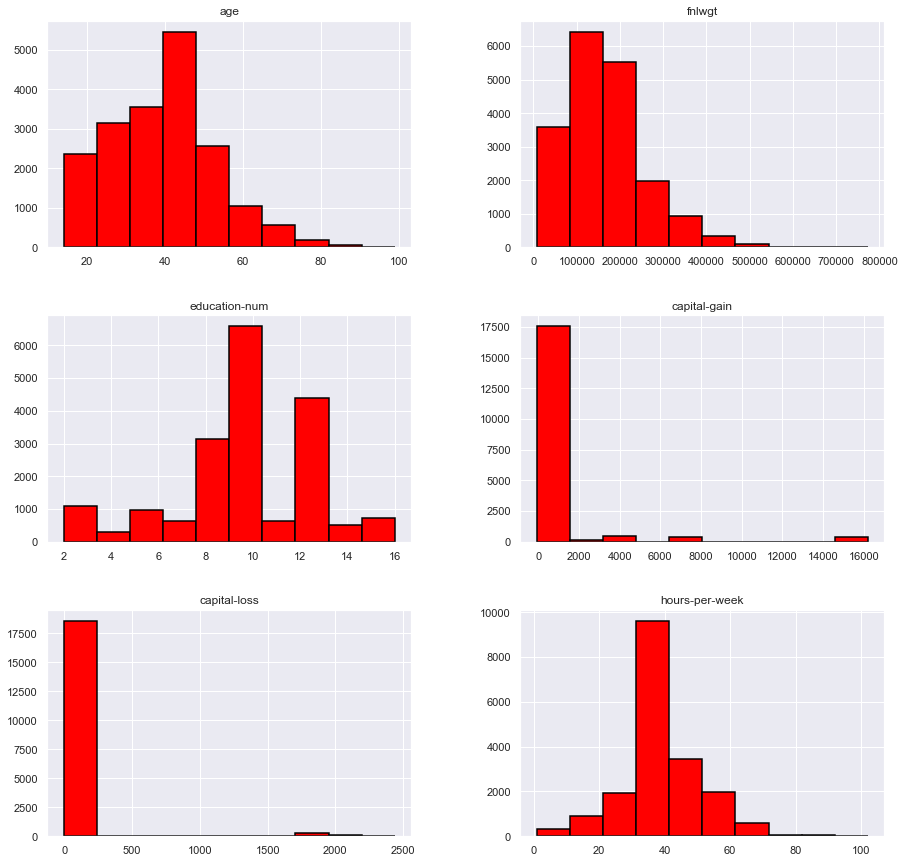

In [10]:
data.hist(figsize=(15,15),linewidth=1.5,edgecolor='black',color='red')

In [11]:
for col in data.columns:
    if data[col].dtypes==object:
        print(data.groupby([col])['hours-per-week'].mean())
        print("--------------------------------------------------------------------")

workclass
 Federal-gov         40.289447
 Local-gov           40.437446
 Never-worked        41.761905
 Private             38.362821
 Self-emp-inc        46.083624
 Self-emp-not-inc    45.182907
 State-gov           39.225885
 Without-pay         39.593023
Name: hours-per-week, dtype: float64
--------------------------------------------------------------------
education
 10th            38.266839
 11th            33.798000
 12th            39.576087
 1st-4th         39.472973
 5th-6th         37.304075
 7th-8th         39.386667
 9th             39.575000
 Assoc-acdm      42.640704
 Assoc-voc       40.431730
 Bachelors       43.956248
 Doctorate       47.031008
 HS-grad         39.008788
 Masters         43.543039
 Preschool       39.977273
 Prof-school     49.945378
 Some-college    37.244860
Name: hours-per-week, dtype: float64
--------------------------------------------------------------------
marital-status
 Divorced                 38.838339
 Married-AF-spouse        33.180180
 

<AxesSubplot:title={'center':'Income class Vs Avg Working time'}, xlabel='income,workclass', ylabel='Avg Working time per week'>

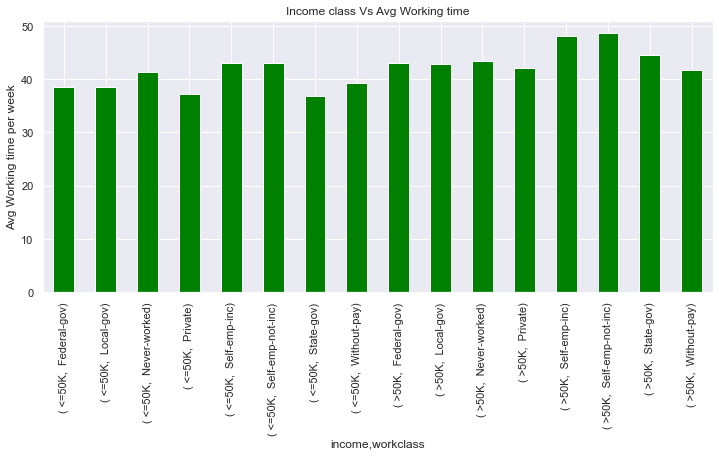

In [12]:
data.groupby(['income','workclass'])['hours-per-week'].mean().plot(kind='bar',title='Income class Vs Avg Working time',ylabel='Avg Working time per week',color='green')

<AxesSubplot:title={'center':'Native Country Vs Avg Working time'}, xlabel='native-country', ylabel='Avg Working time per week'>

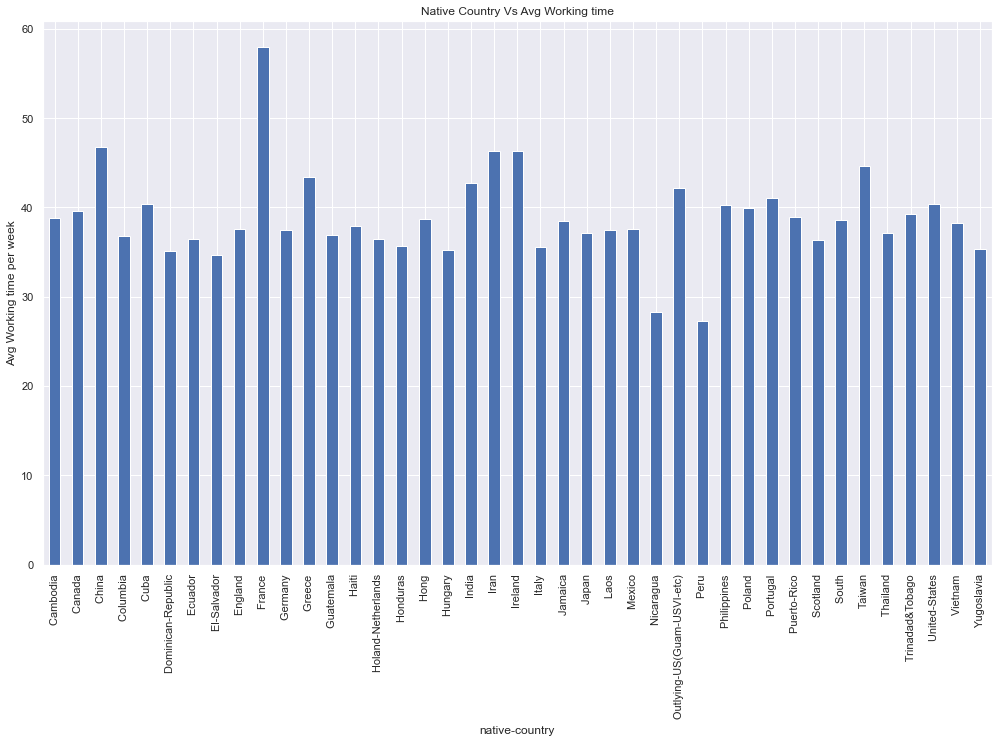

In [13]:
data.groupby(['native-country'])['hours-per-week'].mean().plot(kind='bar',figsize=(17,10),title='Native Country Vs Avg Working time',ylabel='Avg Working time per week')

<AxesSubplot:title={'center':'Race Vs Avg Working time'}, xlabel='race', ylabel='Avg Working time per week'>

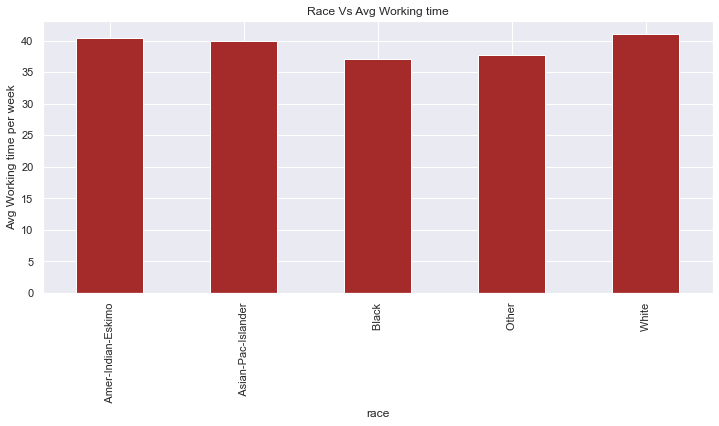

In [14]:
data.groupby(['race'])['hours-per-week'].mean().plot(kind='bar',title='Race Vs Avg Working time',ylabel='Avg Working time per week',color='brown')

<AxesSubplot:title={'center':'Gender Vs Avg Working time'}, ylabel='hours-per-week'>

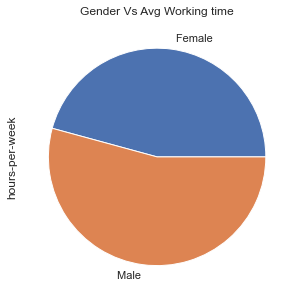

In [15]:
data.groupby(['sex'])['hours-per-week'].mean().plot(kind='pie',title='Gender Vs Avg Working time')

<AxesSubplot:title={'center':'Age Vs Avg Working Hours Per week'}, xlabel='age', ylabel='Avg Working Hours Per week'>

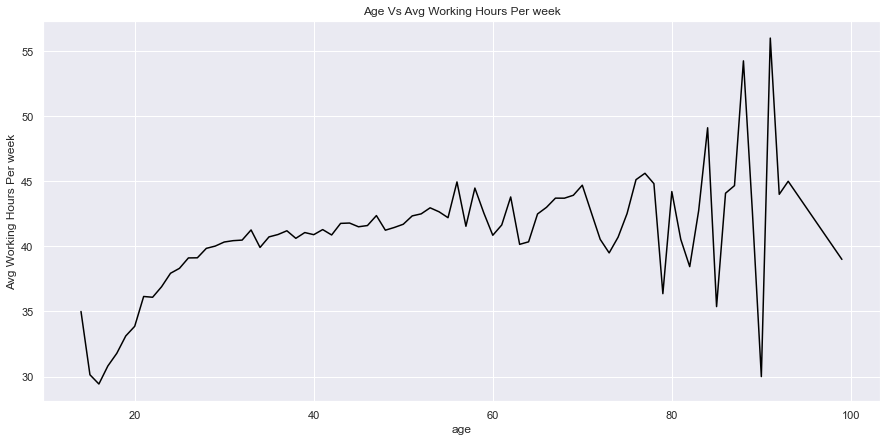

In [16]:
data.groupby(['age'])['hours-per-week'].mean().plot(kind='line',figsize=(15,7),ylabel='Avg Working Hours Per week',title='Age Vs Avg Working Hours Per week',color='black')

<AxesSubplot:title={'center':'Relationship Vs Avg Working time'}, xlabel='relationship', ylabel='Avg Working time per week'>

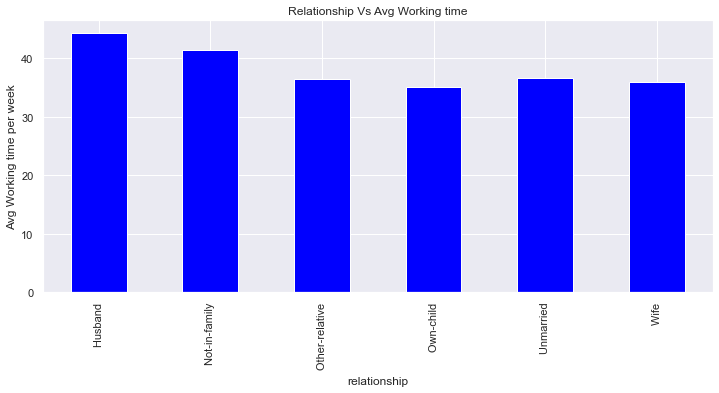

In [17]:
data.groupby(['relationship'])['hours-per-week'].mean().plot(kind='bar',title='Relationship Vs Avg Working time',ylabel='Avg Working time per week',color='blue')

<AxesSubplot:title={'center':'Marital Status Vs Avg Working time'}, ylabel='hours-per-week'>

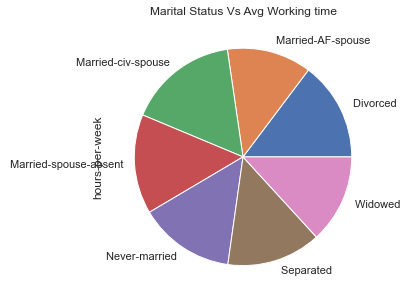

In [18]:
data.groupby(['marital-status'])['hours-per-week'].mean().plot(kind='pie',title='Marital Status Vs Avg Working time')

<AxesSubplot:title={'center':'Workclass Vs Avg Working time'}, xlabel='workclass', ylabel='Avg Working time per week'>

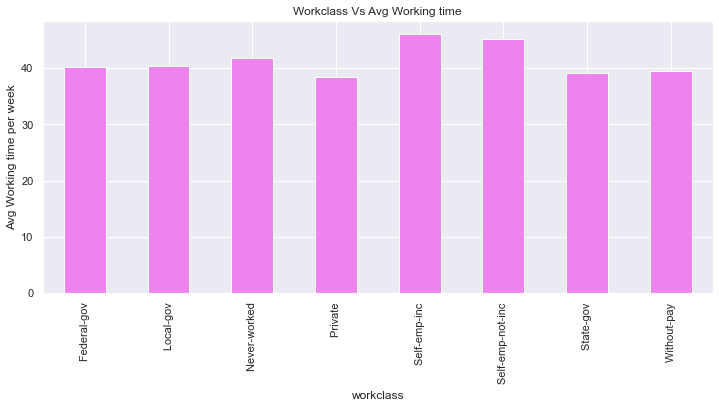

In [19]:
data.groupby(['workclass'])['hours-per-week'].mean().plot(kind='bar',title='Workclass Vs Avg Working time',ylabel='Avg Working time per week',color='violet')

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

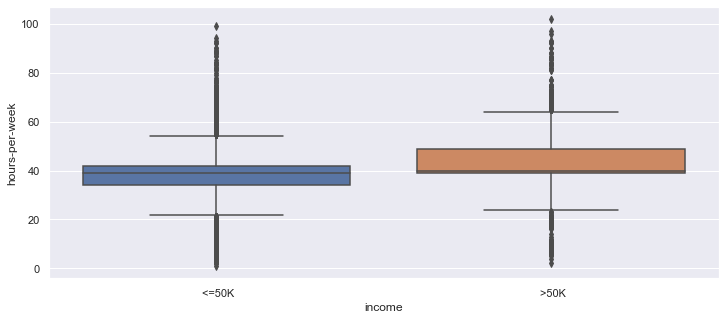

In [20]:
sns.boxplot(x='income',y='hours-per-week',data=data)

<AxesSubplot:xlabel='workclass', ylabel='hours-per-week'>

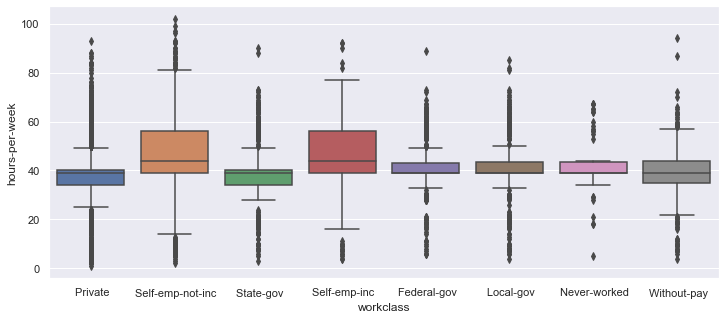

In [21]:
sns.boxplot(x='workclass',y='hours-per-week',data=data)

<AxesSubplot:xlabel='occupation', ylabel='hours-per-week'>

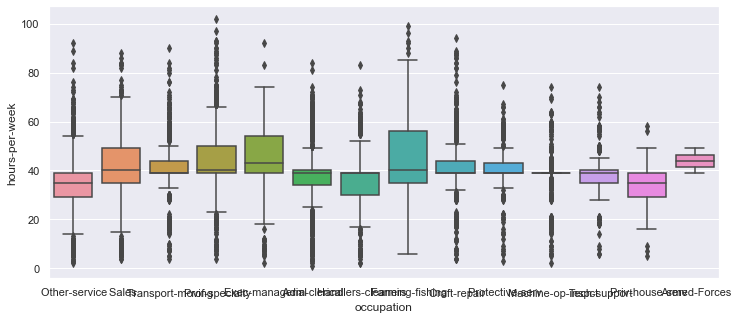

In [22]:
sns.boxplot(x='occupation',y='hours-per-week',data=data)

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

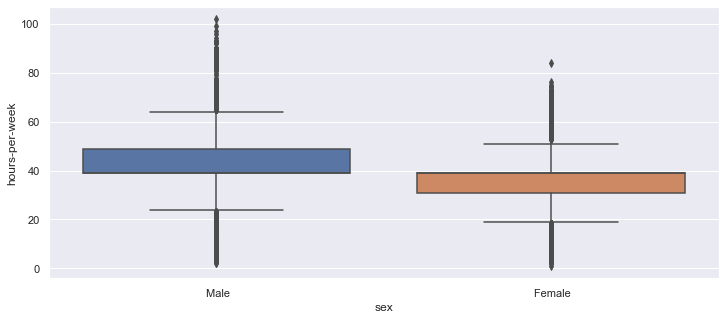

In [23]:
sns.boxplot(x='sex',y='hours-per-week',data=data)

<AxesSubplot:xlabel='race', ylabel='hours-per-week'>

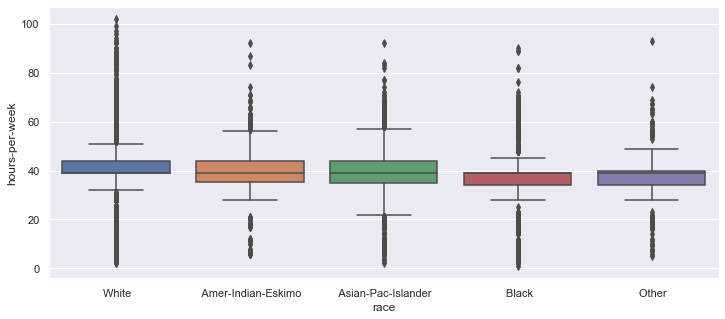

In [24]:
sns.boxplot(x='race',y='hours-per-week',data=data)

In [25]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(include=np.object)

In [26]:
sc=StandardScaler()
oe=OrdinalEncoder()

In [27]:
num_df=pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)
cat_df=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)
final=pd.concat([num_df,cat_df],axis=1)
final.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.950581,-0.699674,-0.169275,-0.240422,-0.133122,0.348847,3.0,11.0,4.0,7.0,4.0,4.0,1.0,38.0,0.0
1,2.742224,-0.339155,0.890806,2.878353,-0.133122,0.348847,5.0,9.0,2.0,11.0,0.0,4.0,1.0,38.0,1.0
2,0.054759,0.845247,1.244166,-0.231310,-0.133122,1.517454,3.0,9.0,2.0,13.0,0.0,0.0,1.0,38.0,1.0
3,2.742224,0.181613,0.890806,2.958290,-0.133122,0.348847,6.0,9.0,2.0,9.0,0.0,4.0,1.0,38.0,1.0
4,-0.243848,-0.523562,1.244166,-0.234209,-0.133122,1.607347,4.0,12.0,0.0,3.0,1.0,4.0,1.0,38.0,0.0


In [28]:
final.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income'],
      dtype='object')

In [29]:
x=final[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income']]
y=final['hours-per-week']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [31]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
ypred=reg.predict(x_test)
print(reg.coef_)
print(reg.intercept_)

[-2.23637983e-16 -1.06729588e-16 -5.28523750e-16  9.67507629e-17
  5.53791971e-16  1.00000000e+00  4.31377619e-17 -1.86606048e-15
 -9.59495553e-17 -1.07784657e-15 -3.37738376e-17  5.83800306e-17
 -4.61963561e-16 -6.56680242e-17 -1.99227464e-16]
2.7305089612961186e-14


In [32]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,ypred))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(y_test,ypred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,ypred))
print("Root Mean Squared Error : ", f"{np.sqrt(metrics.mean_squared_error(y_test,ypred)):.35f}")
print("R^2 Value : ",r2_score(y_test,ypred))

Mean Absolute Error :  6.8434042627036385e-15
Mean Absolute Percentage Error :  6.907381299630235e-14
Mean Squared Error :  7.242570739715442e-29
Root Mean Squared Error :  0.00000000000000851032945291511131097
R^2 Value :  1.0


In [34]:
mlr_model=statsmodels.api.OLS(y_train,x_train).fit()
ypr=mlr_model.predict(x_test)

In [35]:
print(mlr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:         hours-per-week   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.649e+31
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                        0.00
Time:                        13:52:02   Log-Likelihood:                      4.5266e+05
No. Observations:               14208   AIC:                                 -9.053e+05
Df Residuals:                   14193   BIC:                                 -9.052e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [235]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,ypr))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(y_test,ypr))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,ypr))
print("Root Mean Squared Error : ", f"{np.sqrt(metrics.mean_squared_error(y_test,ypr)):.15f}")
print("R^2 Value : ",r2_score(y_test,ypr))

Mean Absolute Error :  2.8919539904695648e-15
Mean Absolute Percentage Error :  2.8833598007675905e-14
Mean Squared Error :  1.2109164964215817e-29
Root Mean Squared Error :  0.000000000000003
R^2 Value :  1.0


In [236]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

In [237]:
final1=final[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country',
       'income']]

In [238]:
calc_vif(final1)

,variables,VIF
0,age,1.164256
1,fnlwgt,1.030904
2,education-num,1.247300
3,capital-gain,1.074046
4,capital-loss,1.008614
5,hours-per-week,1.233906
6,workclass,6.164982
7,education,6.875515
8,marital-status,3.880904
9,occupation,2.777815


In [239]:
final1=final1.drop('native-country',axis=1)

In [240]:
calc_vif(final1)

,variables,VIF
0,age,1.163005
1,fnlwgt,1.030431
2,education-num,1.242967
3,capital-gain,1.074043
4,capital-loss,1.008595
5,hours-per-week,1.233781
6,workclass,5.812366
7,education,6.023606
8,marital-status,3.792291
9,occupation,2.738406


In [241]:
X=final1[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex',
       'income']]
Y=final['hours-per-week']

In [242]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [244]:
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
yprediction=regr.predict(X_test)
print(regr.coef_)
print(regr.intercept_)

[-3.50637427e-16 -2.87604641e-16 -8.02751518e-16 -3.59702606e-17
  6.20299200e-17  1.00000000e+00  2.31943161e-17 -1.66184754e-15
 -2.43633586e-16 -9.11445653e-16 -1.10257451e-16  2.41090772e-16
  1.88940979e-16  6.26470380e-17]
2.157247904616133e-14


In [245]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(Y_test,yprediction))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(Y_test,yprediction))
print("Mean Squared Error : ", metrics.mean_squared_error(Y_test,yprediction))
print("Root Mean Squared Error : ", f"{np.sqrt(metrics.mean_squared_error(Y_test,yprediction)):.35f}")
print("R^2 Value : ",r2_score(Y_test,yprediction))

Mean Absolute Error :  6.117669363772296e-15
Mean Absolute Percentage Error :  6.107258892898446e-14
Mean Squared Error :  5.777942952547524e-29
Root Mean Squared Error :  0.00000000000000760127815077669890823
R^2 Value :  1.0


### Feature Encoding

In [106]:
le = preprocessing.LabelEncoder()

In [107]:
data['workclass'] = le.fit_transform(data['workclass'])

In [108]:
data['education'] = le.fit_transform(data['education'])

In [109]:
data['marital-status'] = le.fit_transform(data['marital-status'])

In [110]:
data['occupation'] = le.fit_transform(data['occupation'])

In [111]:
data['relationship'] = le.fit_transform(data['relationship'])

In [112]:
data['race'] = le.fit_transform(data['race'])

In [113]:
data['sex'] = le.fit_transform(data['sex'])

In [114]:
data['native-country'] = le.fit_transform(data['native-country'])

In [115]:
data['income'] = le.fit_transform(data['income'])

In [116]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,3,98926,11,9,4,7,4,4,1,-3,0,44,38,0
1,76,5,132607,9,12,2,11,0,4,1,7527,0,44,38,1
2,40,3,243258,9,13,2,13,0,0,1,19,0,57,38,1
3,76,6,181259,9,12,2,9,0,4,1,7720,0,44,38,1
4,36,4,115379,12,13,0,3,1,4,1,12,0,58,38,0
5,24,3,274505,9,12,4,9,3,4,0,2,0,40,38,0
6,40,3,80789,11,8,2,0,5,4,0,13,0,35,38,1
7,42,0,243759,15,10,0,0,2,1,0,18,0,39,4,1
8,37,3,67638,9,12,2,3,0,1,1,4,0,39,29,1
9,52,5,130237,11,8,2,11,0,4,1,0,1,55,25,0


### Pairplot and Heatmap

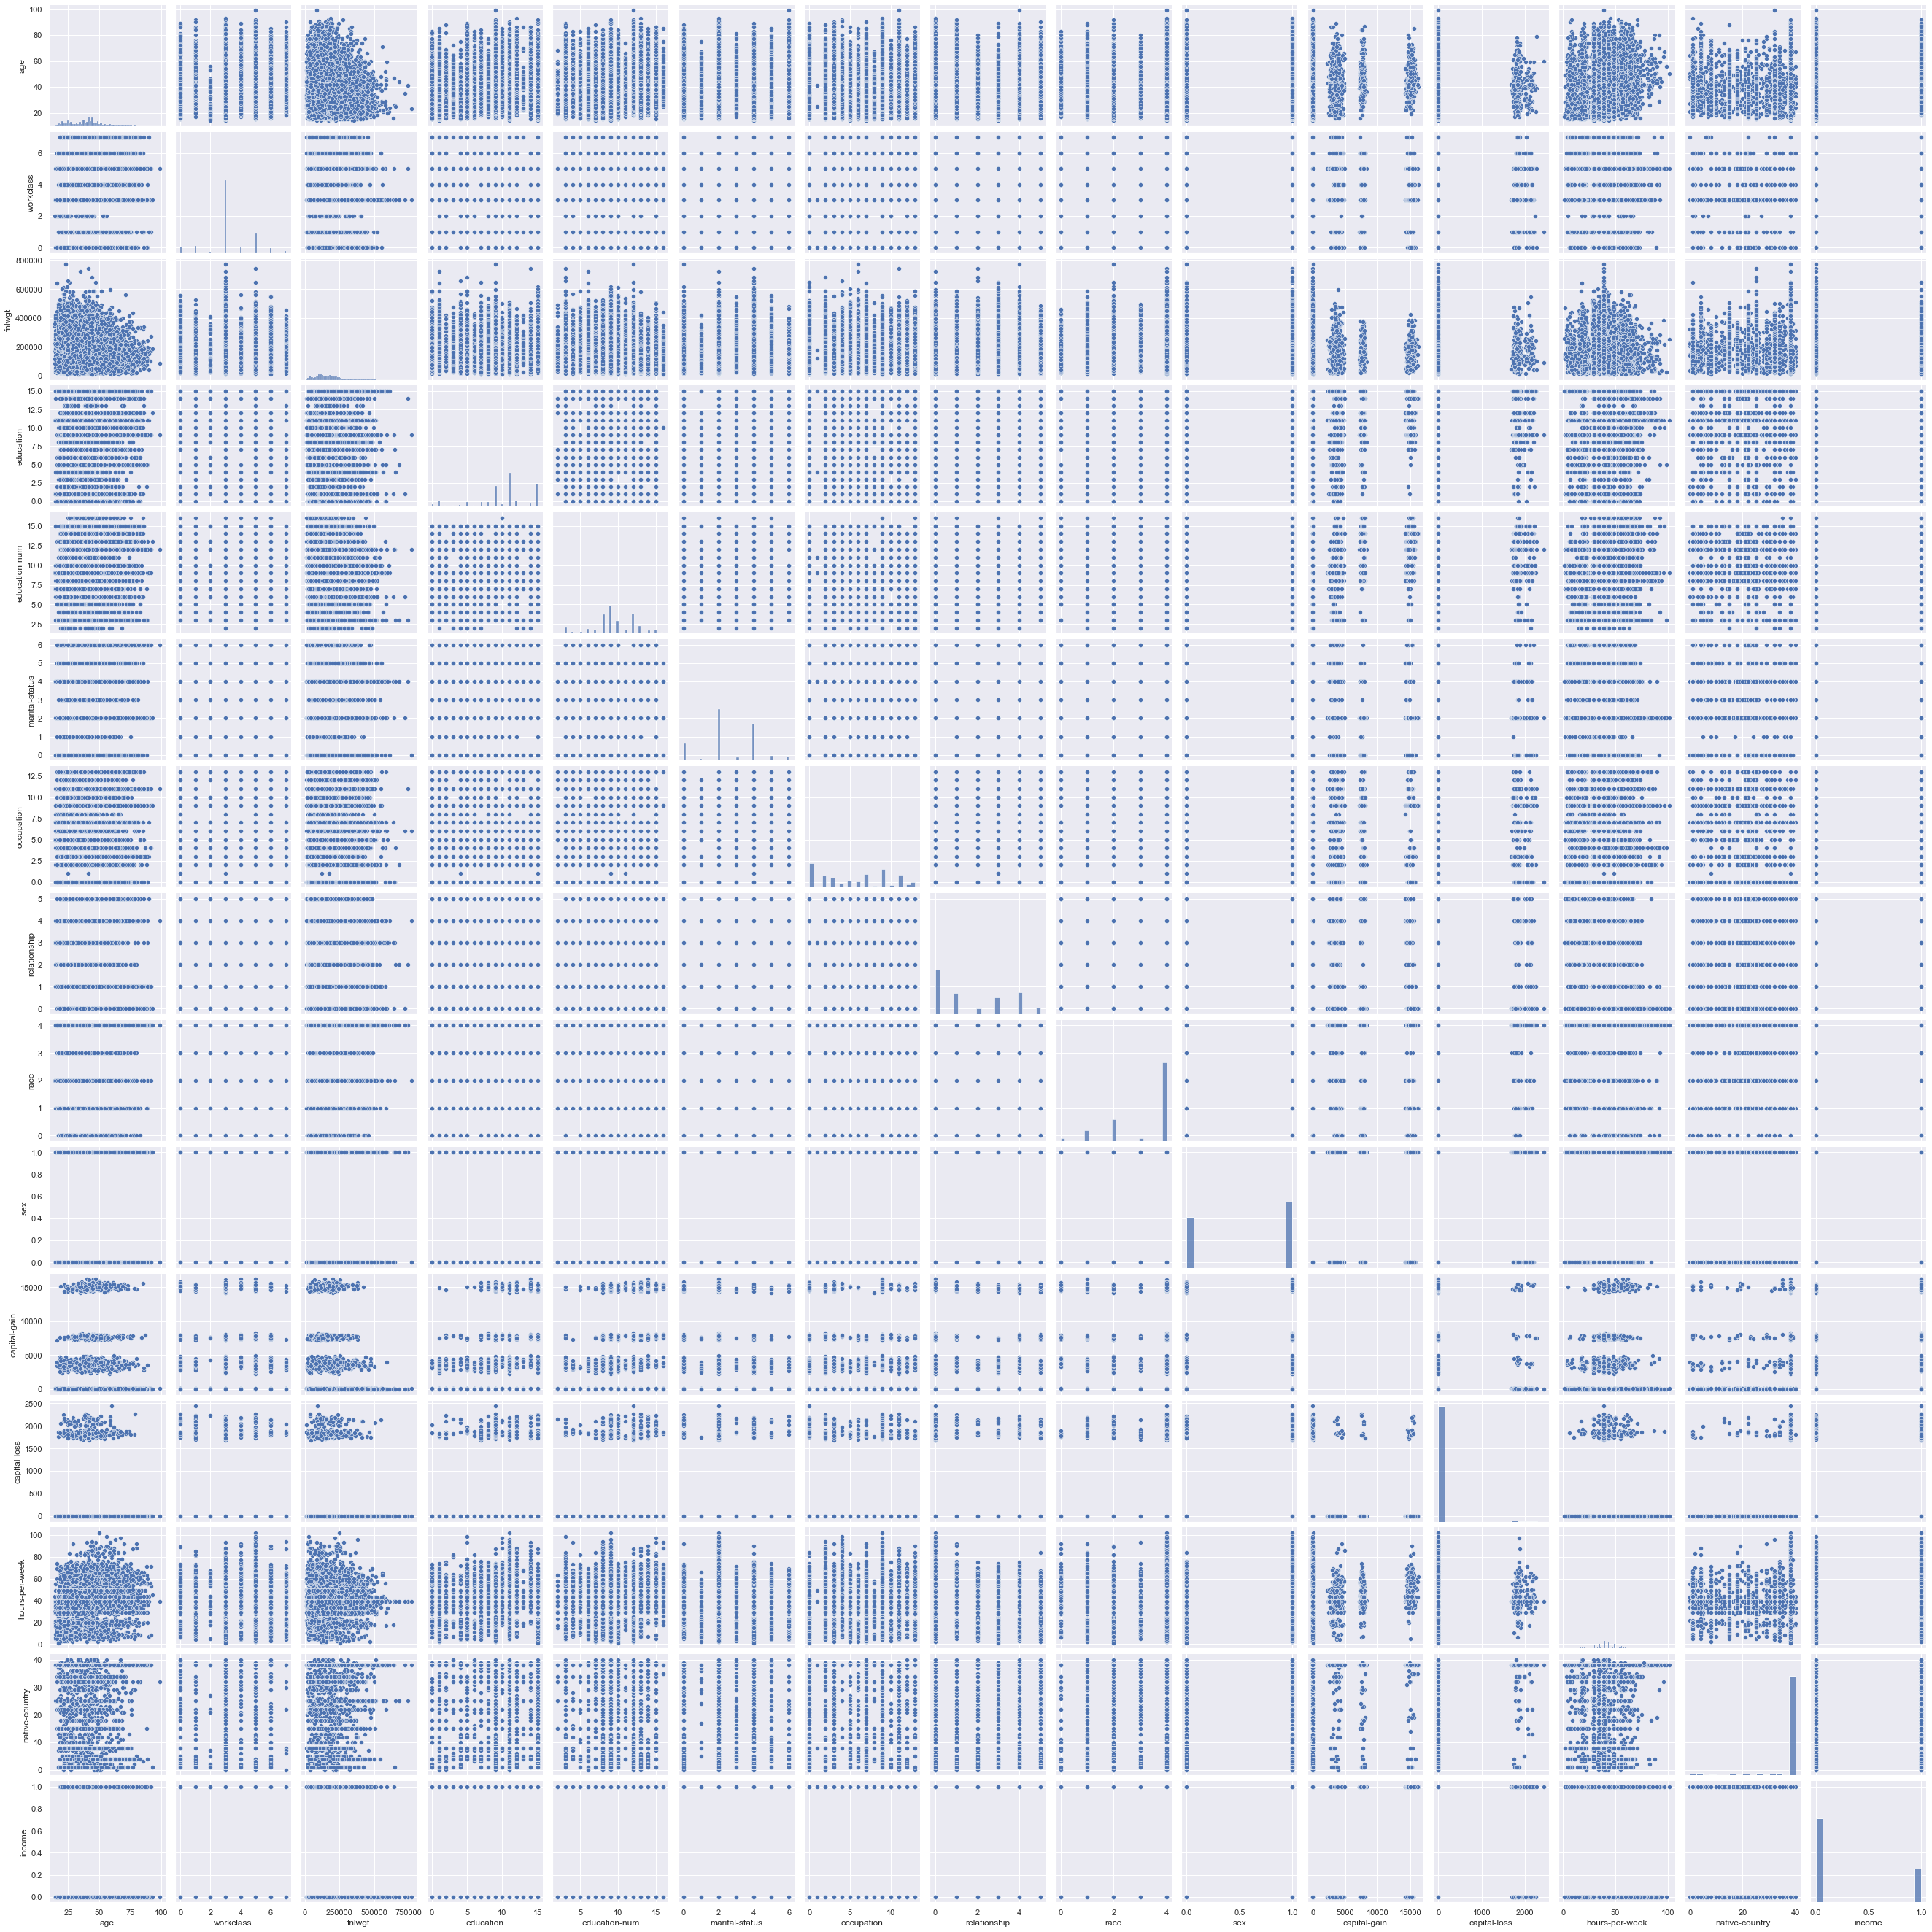

In [117]:
sns.pairplot(data)

In [119]:
cor=data.corr()
print(cor)

                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.142540 -0.109581   0.034316       0.073603   
workclass       0.142540   1.000000 -0.051797   0.000896      -0.000545   
fnlwgt         -0.109581  -0.051797  1.000000   0.019234      -0.108517   
education       0.034316   0.000896  0.019234   1.000000       0.332371   
education-num   0.073603  -0.000545 -0.108517   0.332371       1.000000   
marital-status -0.244467  -0.039117  0.025795  -0.072634      -0.053044   
occupation      0.055374   0.040160 -0.021189  -0.069373       0.051330   
relationship   -0.201499  -0.115308  0.036507  -0.024312      -0.098797   
race            0.047379   0.043993 -0.016748  -0.103289       0.003771   
sex             0.122194   0.134359  0.010111  -0.003323       0.017287   
capital-gain    0.087210   0.011209 -0.021073   0.054073       0.144942   
capital-loss    0.021077  -0.002665 -0.006423   0.024356       0.052373   
hours-per-week  0.201446 

<AxesSubplot:>

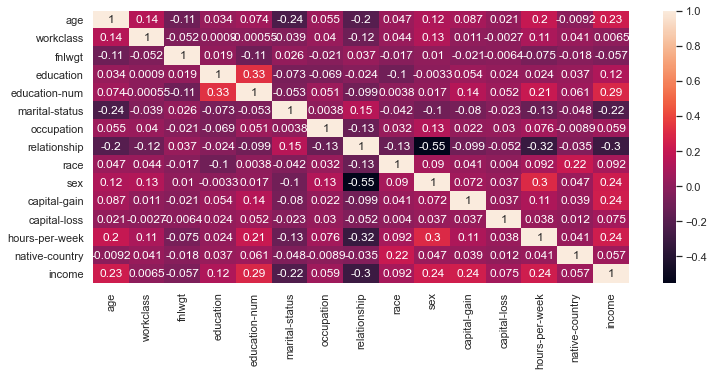

In [120]:
sns.heatmap(cor,annot=True)

### Removing Outliers using z-score

In [124]:
z_scores = sci.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data1 = data[filtered_entries]

In [125]:
data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,3,98926,11,9,4,7,4,4,1,-3,0,44,38,0
1,76,5,132607,9,12,2,11,0,4,1,7527,0,44,38,1
2,40,3,243258,9,13,2,13,0,0,1,19,0,57,38,1
3,76,6,181259,9,12,2,9,0,4,1,7720,0,44,38,1
4,36,4,115379,12,13,0,3,1,4,1,12,0,58,38,0


In [126]:
data1.shape

(16875, 15)

In [127]:
data1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Feature Selection

In [128]:
data2 = data1[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'native-country',
       'income']]

Text(0.5, 1.0, 'Correlation between each variable and hours per week \n')

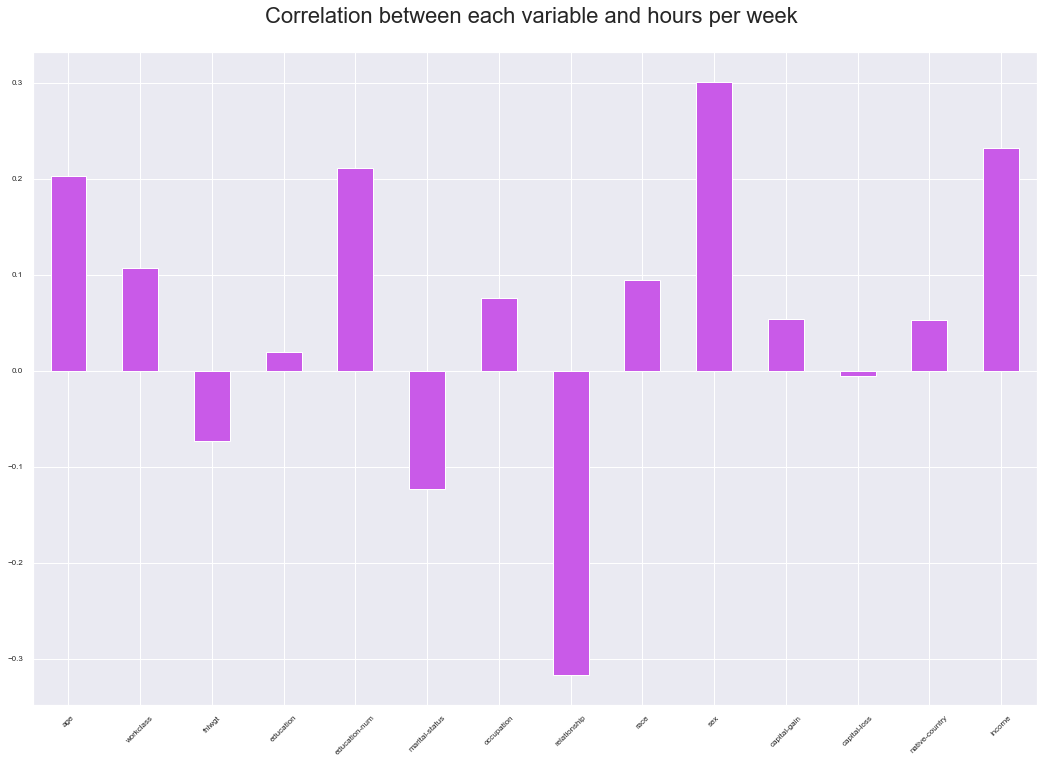

In [131]:
correlations = data2.corrwith(data1['hours-per-week'])
#correlation between same variables are removed
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 12), 
        fontsize = 8, 
        color = '#c95ae8',
        rot = 45, grid = True)
plt.title('Correlation between each variable and hours per week \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

### Multicollinearity Test Using VIF Test

In [134]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

In [135]:
calc_vif(data2)

,variables,VIF
0,age,10.321990
1,workclass,6.637504
2,fnlwgt,4.196404
3,education,8.311030
4,education-num,14.643989
5,marital-status,3.975767
6,occupation,2.818108
7,relationship,2.957367
8,race,9.319757
9,sex,3.270709


In [136]:
data2=data2.drop(['native-country'],axis=1)

In [137]:
calc_vif(data2)

,variables,VIF
0,age,9.181047
1,workclass,6.368977
2,fnlwgt,4.028173
3,education,7.891518
4,education-num,12.948329
5,marital-status,3.796572
6,occupation,2.786302
7,relationship,2.721684
8,race,7.647819
9,sex,3.163851


In [139]:
data2=data2.drop(['education-num'],axis=1)

In [140]:
calc_vif(data2)

,variables,VIF
0,age,8.824337
1,workclass,6.294575
2,fnlwgt,4.027223
3,education,6.201985
4,marital-status,3.672548
5,occupation,2.740498
6,relationship,2.686215
7,race,7.316643
8,sex,3.161944
9,capital-gain,1.079804


In [141]:
data1=data1.drop(['native-country','education-num'],axis=1)

In [142]:
data1.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,52,3,98926,11,4,7,4,4,1,-3,0,44,0
1,76,5,132607,9,2,11,0,4,1,7527,0,44,1
2,40,3,243258,9,2,13,0,0,1,19,0,57,1
3,76,6,181259,9,2,9,0,4,1,7720,0,44,1
4,36,4,115379,12,0,3,1,4,1,12,0,58,0
5,24,3,274505,9,4,9,3,4,0,2,0,40,0
6,40,3,80789,11,2,0,5,4,0,13,0,35,1
8,37,3,67638,9,2,3,0,1,1,4,0,39,1
9,52,5,130237,11,2,11,0,4,1,0,1,55,0
10,47,3,83336,12,3,11,1,1,1,-19,0,59,0


In [144]:
data1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

In [171]:
data3=data1

In [172]:
data3.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,52,3,98926,11,4,7,4,4,1,-3,0,44,0
1,76,5,132607,9,2,11,0,4,1,7527,0,44,1
2,40,3,243258,9,2,13,0,0,1,19,0,57,1
3,76,6,181259,9,2,9,0,4,1,7720,0,44,1
4,36,4,115379,12,0,3,1,4,1,12,0,58,0
5,24,3,274505,9,4,9,3,4,0,2,0,40,0
6,40,3,80789,11,2,0,5,4,0,13,0,35,1
8,37,3,67638,9,2,3,0,1,1,4,0,39,1
9,52,5,130237,11,2,11,0,4,1,0,1,55,0
10,47,3,83336,12,3,11,1,1,1,-19,0,59,0


In [174]:
ss = StandardScaler()
scaleddata = pd.DataFrame(ss.fit_transform(data1),columns = data1.columns)

### Train Test Split

In [175]:
x=scaleddata[['age', 'workclass', 'fnlwgt', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss','income']]
y=scaleddata['hours-per-week']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

### Multiple Linear Regression

In [177]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [178]:
ypred=reg.predict(x_test)

In [179]:
print(reg.coef_)
print(reg.intercept_)

[ 0.09846458  0.04315881 -0.05713758  0.00689365 -0.02881949  0.01069992
 -0.16732038  0.04065498  0.15489905  0.01599944 -0.01529153  0.1069765 ]
-0.007524386016372902


In [180]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,ypred))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(y_test,ypred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,ypred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test,ypred)))
print("R^2 Value : ",r2_score(y_test,ypred))

Mean Absolute Error :  0.6594554891291934
Mean Absolute Percentage Error :  4.521270595551347
Mean Squared Error :  0.8209520668673777
Root Mean Squared Error :  0.9060640522983889
R^2 Value :  0.16485321062463598


### Decision Tree Regressor

In [162]:
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

In [163]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,Ypred))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(y_test,Ypred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,Ypred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test,Ypred)))
print("R^2 Value : ",r2_score(y_test,Ypred))

Mean Absolute Error :  9.695188433278028
Mean Absolute Percentage Error :  0.2851892369561352
Mean Squared Error :  181.51362882199572
Root Mean Squared Error :  13.472699388837997
R^2 Value :  -0.6947728972471878


In [169]:
rf=RandomForestRegressor(n_estimators = 100,random_state=0)
rf.fit(x_train,y_train)
yp=rf.predict(x_test)

In [170]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test,yp))
print("Mean Absolute Percentage Error : ", metrics.mean_absolute_percentage_error(y_test,yp))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test,yp))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test,yp)))
print("R^2 Value : ",r2_score(y_test,yp))

Mean Absolute Error :  6.762156909220194
Mean Absolute Percentage Error :  0.21105781071637905
Mean Squared Error :  86.54875795212136
Root Mean Squared Error :  9.303158493335548
R^2 Value :  0.19190371423014807
